# Singular value decomposition
特異値分解について

In [1]:
%matplotlib inline
import numpy as np
import random
import matplotlib.pyplot as plt

なんかこんな感じに分けるやつ
$$
A=U\Sigma V
$$

In [2]:
A = np.array([[ 2,  2,  2,  2],
              [ 1, -1,  1, -1],
              [-1,  1, -1,  1]])

In [3]:
U, S, V = np.linalg.svd(A)

In [4]:
U

array([[  1.00000000e+00,   7.85046229e-17,   4.50751228e-34],
       [  5.55111512e-17,  -7.07106781e-01,   7.07106781e-01],
       [ -5.55111512e-17,   7.07106781e-01,   7.07106781e-01]])

In [5]:
S

array([  4.00000000e+00,   2.82842712e+00,   6.87547936e-17])

In [6]:
V

array([[  5.00000000e-01,   5.00000000e-01,   5.00000000e-01,
          5.00000000e-01],
       [ -5.00000000e-01,   5.00000000e-01,  -5.00000000e-01,
          5.00000000e-01],
       [  7.07106781e-01,   0.00000000e+00,  -7.07106781e-01,
          5.55111512e-17],
       [ -8.12941988e-18,  -7.07106781e-01,   3.06513540e-17,
          7.07106781e-01]])

In [7]:
U.dot(np.c_[np.diag(S), np.zeros([3,1])]).dot(V)

array([[ 2.,  2.,  2.,  2.],
       [ 1., -1.,  1., -1.],
       [-1.,  1., -1.,  1.]])

In [8]:
U, S, V = np.linalg.svd(A, full_matrices=False)

In [9]:
U

array([[  1.00000000e+00,   7.85046229e-17,   4.50751228e-34],
       [  5.55111512e-17,  -7.07106781e-01,   7.07106781e-01],
       [ -5.55111512e-17,   7.07106781e-01,   7.07106781e-01]])

In [10]:
S

array([  4.00000000e+00,   2.82842712e+00,   6.87547936e-17])

In [11]:
V

array([[  5.00000000e-01,   5.00000000e-01,   5.00000000e-01,
          5.00000000e-01],
       [ -5.00000000e-01,   5.00000000e-01,  -5.00000000e-01,
          5.00000000e-01],
       [  7.07106781e-01,   0.00000000e+00,  -7.07106781e-01,
          5.55111512e-17]])

In [12]:
U.dot(np.diag(S)).dot(V)

array([[ 2.,  2.,  2.,  2.],
       [ 1., -1.,  1., -1.],
       [-1.,  1., -1.,  1.]])

### 正方行列の特異値、特異ベクトルは固有値、固有ベクトルと同じ

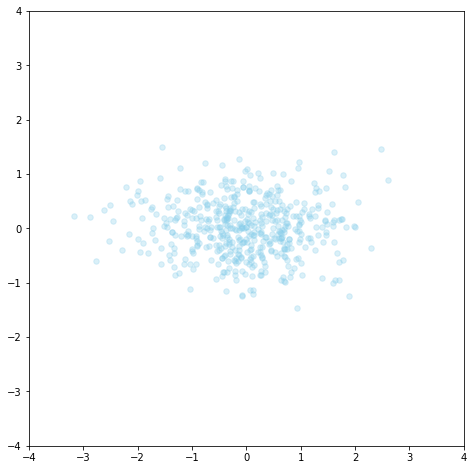

In [51]:
pos = []         #点の位置
sigma_x = 1.0    #xの標準偏差の設定
sigma_y = 0.5    #yの標準偏差の設定
num = 500        #サンプルの数

#設定した標準偏差を元に点群を生成
for i in range(num):
    pos.append(np.array([random.gauss(0, sigma_x), random.gauss(0, sigma_y)]))
    
#点群の描画関数
def draw(pos):
    fig = plt.figure(i, figsize=(8,8))
    sp = fig.add_subplot(111,aspect='equal')
    sp.set_xlim(-4.0,4.0)
    sp.set_ylim(-4.0,4.0)
    
    xs = [e[0] for e in pos]
    ys = [e[1] for e in pos]
    
    plt.scatter(xs,ys,s=30,marker="o",label="landmarks",alpha=0.3,color="skyblue")
    #plt.show()
    
#描画
draw(pos)

In [40]:
mean_x = 0
mean_y = 0

for p in pos:
    mean_x += p[0] / num
    mean_y += p[1] / num
    
print("mean x =\n", mean_x, "\nmean y =\n", mean_y)

mean x =
 -0.00266267889866 
mean y =
 0.013399757274


In [41]:
v_x = 0
v_y = 0
sigma_xy = 0

for p in pos:
    v_x += (mean_x - p[0]) ** 2 / num
    v_y += (mean_y - p[1]) ** 2 / num
    sigma_xy += (mean_x - p[0]) * (mean_y - p[1]) / num
    
cov = np.array([[v_x, sigma_xy],
                [sigma_xy, v_y]])

print("cov =\n",cov)

cov =
 [[ 0.88531817 -0.01197615]
 [-0.01197615  0.26452429]]


In [42]:
U, S, V = np.linalg.svd(cov)

In [43]:
U

array([[-0.99981411,  0.01928091],
       [ 0.01928091,  0.99981411]])

In [44]:
S

array([ 0.88554912,  0.26429334])

In [45]:
V

array([[-0.99981411,  0.01928091],
       [ 0.01928091,  0.99981411]])

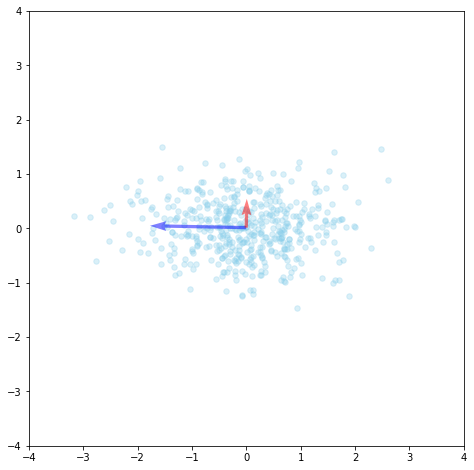

In [62]:
draw(pos)
v1 = S[0] * 2 * U[0:2, 0:1]
v2 = S[1] * 2 * U[0:2, 1:2]
plt.quiver(mean_x,mean_y,v1[0],v1[1],angles='xy',scale_units='xy',scale=1,color="blue",alpha=0.5)
plt.quiver(mean_x,mean_y,v2[0],v2[1],angles='xy',scale_units='xy',scale=1,color="red",alpha=0.5)

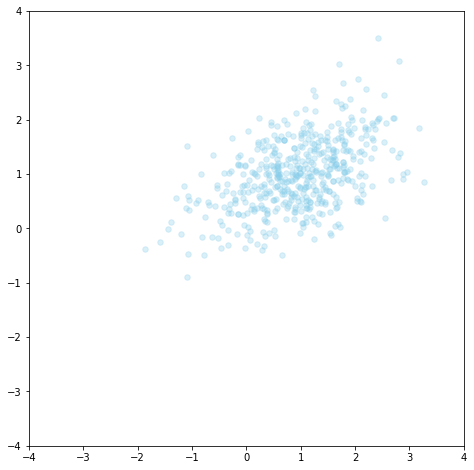

In [64]:
t = np.pi / 6
c = np.cos(t)
s = np.sin(t)

rot = np.array([[c, -s],
                [s, c]])

for i in range(len(pos)):
    pos[i] = rot.dot(pos[i])
    pos[i] += np.array([1,1])
    
draw(pos)

In [65]:
mean_x = 0
mean_y = 0

for p in pos:
    mean_x += p[0] / num
    mean_y += p[1] / num
    
print("mean x =\n", mean_x, "\nmean y =\n", mean_y)

v_x = 0
v_y = 0
sigma_xy = 0

for p in pos:
    v_x += (mean_x - p[0]) ** 2 / num
    v_y += (mean_y - p[1]) ** 2 / num
    sigma_xy += (mean_x - p[0]) * (mean_y - p[1]) / num
    
cov = np.array([[v_x, sigma_xy],
                [sigma_xy, v_y]])

print("cov =\n",cov)

mean x =
 0.941313153492 
mean y =
 0.987015584276
cov =
 [[ 0.75868014  0.2674966 ]
 [ 0.2674966   0.41023365]]


In [66]:
U, S, V = np.linalg.svd(cov)

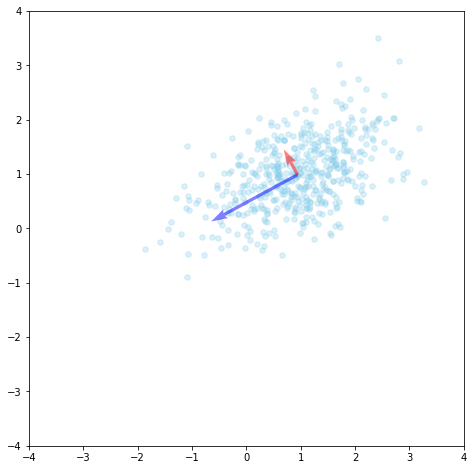

In [67]:
draw(pos)
v1 = S[0] * 2 * U[0:2, 0:1]
v2 = S[1] * 2 * U[0:2, 1:2]
plt.quiver(mean_x,mean_y,v1[0],v1[1],angles='xy',scale_units='xy',scale=1,color="blue",alpha=0.5)
plt.quiver(mean_x,mean_y,v2[0],v2[1],angles='xy',scale_units='xy',scale=1,color="red",alpha=0.5)